In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
files_train = 'C:/Users/User/OneDrive/Desktop/Identification-Detection/Fruit_Detection/archive/train_zip/train'
files_test = 'C:/Users/User/OneDrive/Desktop/Identification-Detection/Fruit_Detection/archive/test_zip/test'

In [4]:
import cv2
from PIL import Image

In [5]:
images = []       
labels = [] 
train_path = files_train
for filename in os.listdir(train_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path, filename))
        ary = Image.fromarray(img, 'RGB')
        r = ary.resize((50, 50))
        labels.append(filename.split('_')[0])
        images.append(np.array(r))

In [6]:
np.unique(labels)

array(['apple', 'banana', 'mixed', 'orange'], dtype='<U6')

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
la = LabelEncoder()
labels = pd.DataFrame(labels)
labels = la.fit_transform(labels[0])
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [9]:
import matplotlib.pyplot as plt

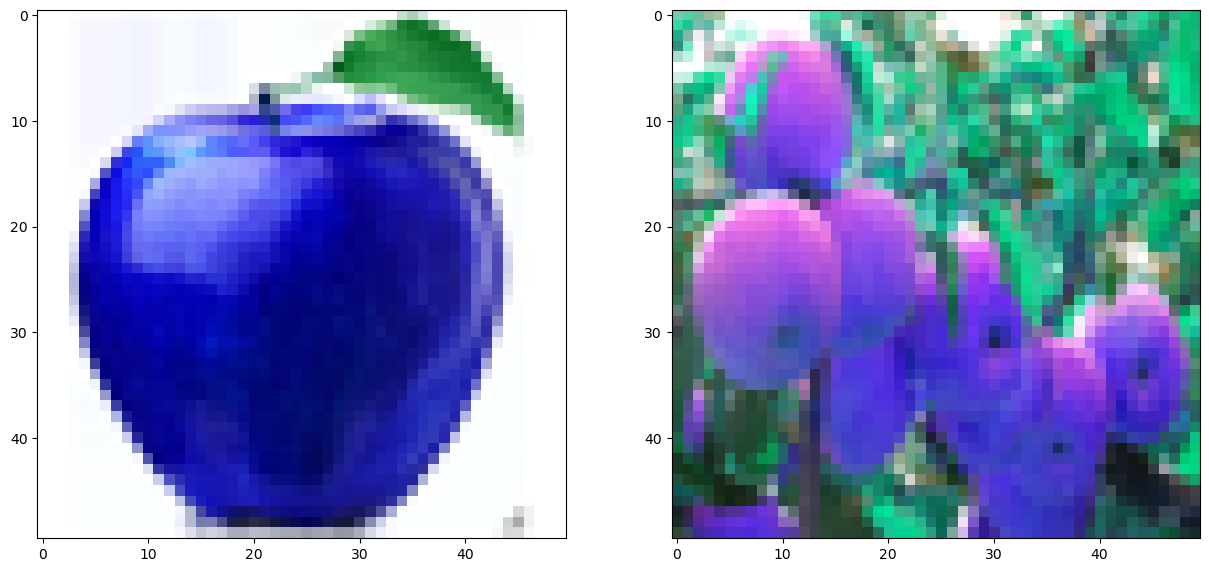

In [10]:
figure = plt.figure(figsize=(15, 10))
ax = figure.add_subplot(121)
ax.imshow(images[0])
bx = figure.add_subplot(122)
bx.imshow(images[60])
plt.show()

In [11]:
images=np.array(images)
np.save("image",images)
np.save("labels",labels)

In [12]:
image=np.load("image.npy",allow_pickle=True)
labels=np.load("labels.npy",allow_pickle=True)

In [13]:
s=np.arange(image.shape[0])
np.random.shuffle(s)
image=image[s]
labels=labels[s]

In [14]:
num_classes=len(np.unique(labels))
len_data=len(image)

In [15]:
x_train,x_test=image[(int)(0.1*len_data):],image[:(int)(0.1*len_data)]

In [16]:
y_train,y_test=labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]

In [17]:
import keras
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [18]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.layers import Activation, Convolution2D, Dropout, Conv2D,AveragePooling2D, BatchNormalization,Flatten,GlobalAveragePooling2D
from keras import layers
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau

In [20]:
l2_reg=0.001
opt=Adam(lr=0.001)

In [21]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(2,2), input_shape=(50,50, 3), activation='relu',kernel_regularizer=l2(l2_reg)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(2,2), activation='relu',kernel_regularizer=l2(l2_reg)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(2,2), activation='relu',kernel_regularizer=l2(l2_reg)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 49, 49, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 128)         0

In [22]:
filepath="weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
history=model.fit(x_train,y_train,batch_size=128,epochs=110,verbose=1,validation_split=0.33,callbacks=[checkpoint])

Epoch 1/110



1/2 [==============>...............] - ETA: 0s - loss: 9.2271 - accuracy: 0.2891
Epoch 1: loss improved from inf to 9.66222, saving model to weights.hdf5
2/2 [==============================] - 1s 197ms/step - loss: 9.6622 - accuracy: 0.3125 - val_loss: 6.1604 - val_accuracy: 0.3056
Epoch 2/110
1/2 [==============>...............] - ETA: 0s - loss: 6.8823 - accuracy: 0.3906
Epoch 2: loss improved from 9.66222 to 6.68561, saving model to weights.hdf5
2/2 [==============================] - 0s 48ms/step - loss: 6.6856 - accuracy: 0.3750 - val_loss: 6.2992 - val_accuracy: 0.3472
Epoch 3/110
1/2 [==============>...............] - ETA: 0s - loss: 6.5705 - accuracy: 0.3438
Epoch 3: loss did not improve from 6.68561
2/2 [==============================] - 0s 28ms/step - loss: 6.8391 - accuracy: 0.3472 - val_loss: 2.3195 - val_accuracy: 0.4306
Epoch 4/110
1/2 [==============>...............] - ETA: 0s - loss: 2.4634 - accuracy: 0.4453

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: loss improved from 6.68561 to 2.70035, saving model to weights.hdf5
2/2 [==============================] - 0s 49ms/step - loss: 2.7003 - accuracy: 0.4097 - val_loss: 2.5766 - val_accuracy: 0.3056
Epoch 5/110
1/2 [==============>...............] - ETA: 0s - loss: 2.7116 - accuracy: 0.3125
Epoch 5: loss improved from 2.70035 to 2.69516, saving model to weights.hdf5
2/2 [==============================] - 0s 48ms/step - loss: 2.6952 - accuracy: 0.3125 - val_loss: 2.1922 - val_accuracy: 0.3889
Epoch 6/110
1/2 [==============>...............] - ETA: 0s - loss: 2.0714 - accuracy: 0.3828
Epoch 6: loss improved from 2.69516 to 2.04332, saving model to weights.hdf5
2/2 [==============================] - 0s 49ms/step - loss: 2.0433 - accuracy: 0.3750 - val_loss: 1.3984 - val_accuracy: 0.2639
Epoch 7/110
1/2 [==============>...............] - ETA: 0s - loss: 1.2474 - accuracy: 0.4688
Epoch 7: loss improved from 2.04332 to 1.21467, saving model to weights.hdf5
2/2 [=======================

In [23]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

1/1 [==============================] - 0s 17ms/step - loss: 0.2632 - accuracy: 0.9583
Test loss: 0.2631947100162506
Test accuracy: 0.9583333134651184


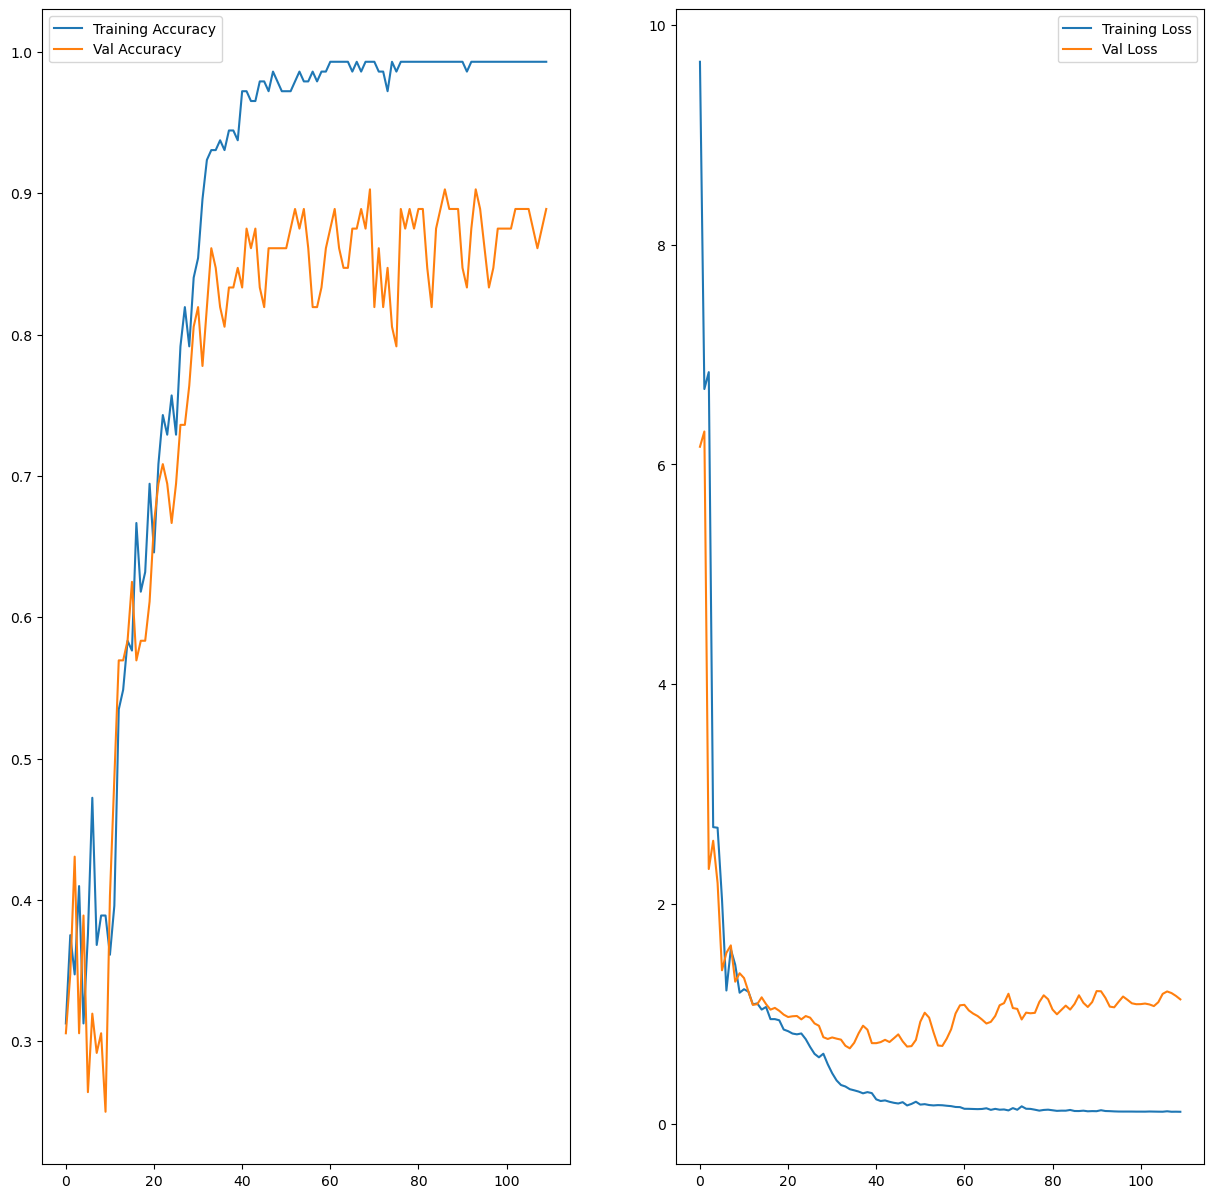

In [24]:
figure=plt.figure(figsize=(15,15))
ax=figure.add_subplot(121)
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
ax.legend(['Training Accuracy','Val Accuracy'])
bx=figure.add_subplot(122)
bx.plot(history.history['loss'])
bx.plot(history.history['val_loss'])
bx.legend(['Training Loss','Val Loss'])

In [25]:
test_path = files_test
t_labels=[]
t_images=[]
for filename in os.listdir(test_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        ary=Image.fromarray(img,'RGB')
        r=ary.resize((50,50))
        t_labels.append(filename.split('_')[0])
        t_images.append(np.array(r))

In [26]:
t_images=np.array(t_images)
np.save("t_image",t_images)
t_image=np.load("image.npy",allow_pickle=True)

In [27]:
pred=np.argmax(model.predict(t_image),axis=1)
prediction = la.inverse_transform(pred)

8/8 [==============================] - 0s 3ms/step


In [28]:
t_image=np.expand_dims(t_images[10],axis=0)
pred_t=np.argmax(model.predict(t_image),axis=1)
prediction_t = la.inverse_transform(pred_t)

1/1 [==============================] - 0s 22ms/step


apple


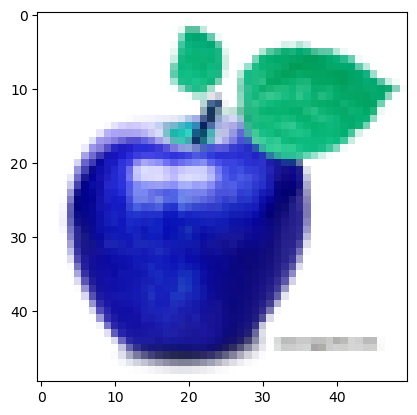

In [29]:
print(prediction_t[0])
plt.imshow(t_images[10])

In [30]:
t_image=np.expand_dims(t_images[20],axis=0)
pred_t=np.argmax(model.predict(t_image),axis=1)
prediction_t = la.inverse_transform(pred_t)

1/1 [==============================] - 0s 14ms/step


banana


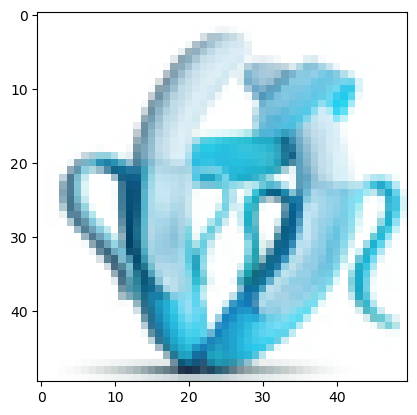

In [31]:
print(prediction_t[0])
plt.imshow(t_images[20])

In [32]:
def predict(i):
    t_image=np.expand_dims(t_images[i],axis=0)
    pred_t=np.argmax(model.predict(t_image),axis=1)
    prediction_t = la.inverse_transform(pred_t)
    print(prediction_t[0])
    plt.imshow(t_images[i])

1/1 [==============================] - 0s 12ms/step
banana


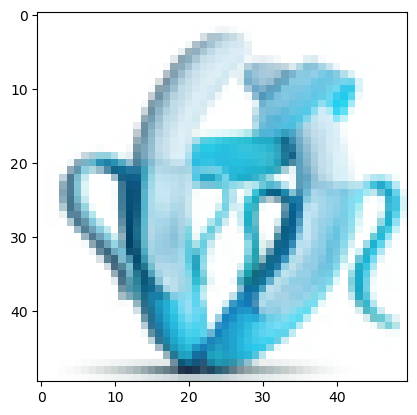

In [33]:
predict(20)

1/1 [==============================] - 0s 14ms/step
orange


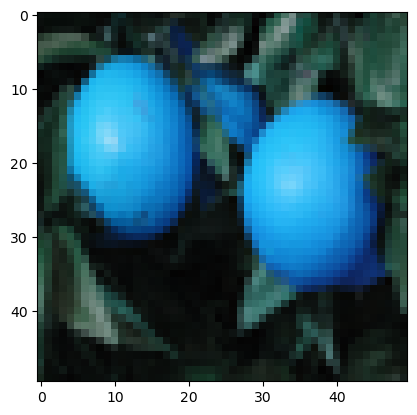

In [34]:
predict(53)

In [35]:
vecteur_entree = range(60)

vecteur_resultat = []  

for element in vecteur_entree:
    t_image=np.expand_dims(t_images[element],axis=0)
    pred_t=np.argmax(model.predict(t_image),axis=1)
    prediction_t = la.inverse_transform(pred_t)
    resultat = prediction_t[0]
    vecteur_resultat.append(resultat)

print(vecteur_resultat)

1/1 [==============================] - 0s 13ms/step
['apple', 'apple', 'orange', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'banana', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'orange', 'banana', 'apple', 'orange', 'banana', 'banana', 'banana', 'banana', 'banana', 'orange', 'banana', 'apple', 'orange', 'apple', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange']


In [36]:
if len(vecteur_resultat) == len(t_labels):
    correspondances = sum(1 for x, y in zip(vecteur_resultat, t_labels) if x == y)

    pourcentage = (correspondances / len(vecteur_resultat)) * 100

    print("Nombre de correspondances :", correspondances)
    print("Pourcentage de correspondances :", pourcentage, "%")

Nombre de correspondances : 50
Pourcentage de correspondances : 83.33333333333334 %
